<a href="https://colab.research.google.com/github/pds2021/a5-ChrNikEsc/blob/assignment_5/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Practical Data Science 20/21*
# Programming Assignment 5 - Create your own App

In this programming assignment you'll build a model that serves as a foundation for your own app. To this end, you will create your own dataset, build a deep learning model on this data, and deploy it!

In [ ]:
import fastai

In [ ]:
!pip install -Uqq fastai

     |████████████████████████████████| 194kB 8.4MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 


In [ ]:
from fastai.vision.all import *

In [ ]:
from fastai.vision.widgets import *

__Google Drive integration__

If you want to store and access your downloaded data for this assignment you can use the following code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
#!mkdir /content/drive/My\ Drive/pds_a5
#%cd /content/drive/My\ Drive/pds_a5

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/pds_a5"

healthy  pneunomia


## Develop an Application Idea

___Free your mind - this part is totally up to you.___

Think of an app that you'd like to build.
*   What useful app have you been missing?
*   Do you have any hobbies an app could be helpful for?
*   Is this a suitable classification or regression task? 
*   How could you get the data?


Aus zwei Datensätzen im Internet, nämlich

*   https://github.com/ieee8023/covid-chestxray-dataset
*   https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

erstelle ich einen neuen Datensatz in Google Drive, der in Aufnahmen von gesunden und kranken Lungen unterteilt ist. Ziel ist, dass man in der App ein Röntgenbild (s)einer Lunge hochladen kann und erfäht, ob man krank ist. Ursprüngliche Idee war, COVID-Lungen zu identifizieren. Das erschien mir in Anbetracht meiner Anfängerskills und der kleineren Datenmenge etwas ambitioniert.

You can get an inspiration from these Apps:

<table>
<tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/5.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/400">Guitar Classifier</a> by Christian Werner</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/6.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/340">Healthy or Not!</a> by Nikhil Utane </td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/7.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/333">Hummingbird Classifier</a> by Nissan Dookeran</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/8.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/409">Edible Mushroom?</a> by Ramon</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/9.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/387">Cousin Recognizer</a> by Charlie Harrington</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/10.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/386">Emotion Classifier</a> by Ethan Sutin and Team 26</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/11.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/350">American Sign Language</a> by Keyur Paralkar</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/12.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/355">Your City from Space</a> by Henri Palacci</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/13.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/367">Univariate TS as images using Gramian Angular Field</a> by Ignacio Oguiza</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/14.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/348">Face Expression Recognition</a> by Pierre Guillou</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/15.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/352">Tumor-normal sequencing</a> by Alena Harley</td><td>  </td>
</tr><table>

## Creating your own Dataset

Now you need to construct a dataset that allows you to train a model for your app. You learned about how to create a dataset in Lecture 7.

Here, you can follow the steps from the lecture or look into the following ressources:

*   A [tool](https://github.com/toffebjorkskog/ml-tools/blob/master/gi2ds.md) for excluding irrelevant images from Google Image Search results beforehand by @melonkernel
*   See this [post](https://www.christianwerner.net/tech/Build-your-image-dataset-faster/) about an alternative image downloader/cleaner by @cwerner
*   Of course, you can use your own data/images :) 

Mein aus den beiden obengenannten Datensets erstelltes Datenset liegt unter https://drive.google.com/drive/folders/1s_6idwEkxDauZd9gKEEa6-u4WHJtinbP?usp=sharing

Deswegen überspringe ich die folgenden Schritte.

### 1. Dowload the data 
- You may use the helper functions from the lecture to get the image URLs
- Create a new folder at your defined `path`
- Use `download_image` to download the images into the corresponding (sub-)directories

In [ ]:
# Write your code here

### 2. Verify Images
- First, create a list of all your images
- Use `verify_images` and `unlink` to remove broken images

In [ ]:
# Write your code here

### 3. Create the DataBlock
For this, you need to think of:
- What kinds of data we are working with
- How to get the list of items
- How to label these items
- How to create the validation set

Use `RandomResizedCrop` for `item_tfms`with an image size of 224 px, and the appropriate `aug_transforms` as `batch_tfms`.

In meinem Fall sind die Bilder (und die gegebenenfalls später zu identifizierenden) alle aus der gleichen Perspektive aufgenommen und das Datenset ist recht groß. Deshalb wähle ich keine andere Transformation.

In [ ]:
lungs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

### 4. Create the DataLoaders

In [ ]:
dls = lungs.dataloaders("/content/drive/My Drive/pds_a5")

### 5. Take a look at some of your pictures. 
Does everything look as expected?

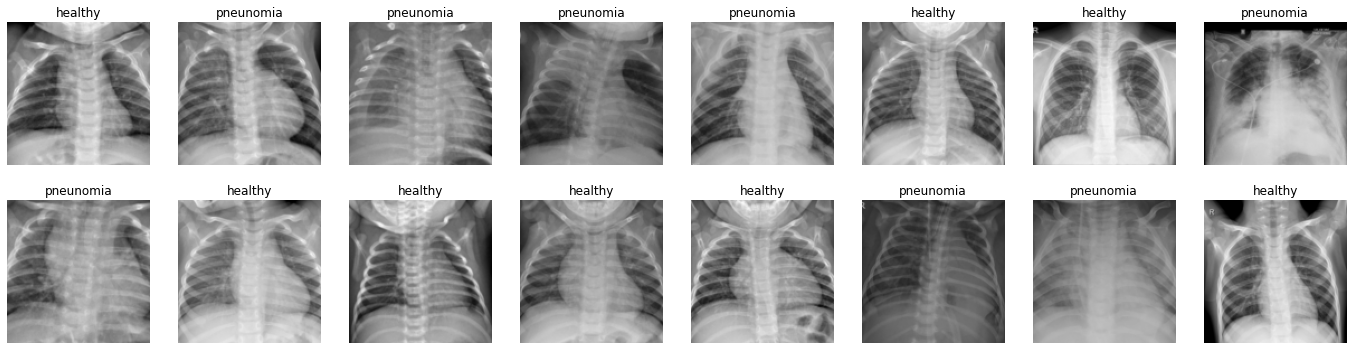

In [ ]:
dls.valid.show_batch(max_n=16, nrows=2)

Leider habe ich keinen Plan, ob das wie erwartet aussieht.. Ich hätte wahrscheinlich besser Autos genommen.

## Modeling

### 6. Create a learner

Create an appropriate learner for your data
- Choose an appropriate model [architecture](https://fastai1.fast.ai/vision.models.html)
- Choose appropriate [metrics](https://docs.fast.ai/metrics.html) for your task

Architektur und Metriken habe ich von https://medium.com/x8-the-ai-community/using-x-ray-images-to-detect-covid-19-patients-9ba911716900 übernommen, wo ein sehr ähnliches Problem gelöst wurde.

Ohne diesen Artikel hätte ich vermutlich nur accuracy als Metrik gewählt.

In [ ]:
precision=Precision()
recall=Recall()

In [ ]:
# Download Resnet50 model
learn = cnn_learner(dls, models.resnet50, metrics=(accuracy, precision, recall))

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=1.0964781722577754e-06)

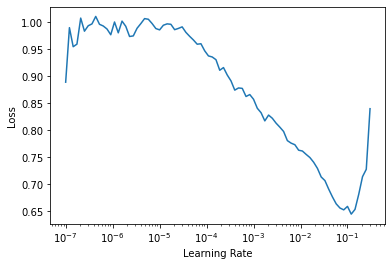

In [ ]:
learn.lr_find()

In [ ]:

learn.fit_one_cycle(4, 0.02)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.221053,0.296314,0.925731,0.925234,0.981169,04:09
1,0.209863,0.447183,0.892723,0.995423,0.862240,01:54
2,0.141044,0.073304,0.967742,0.972603,0.985134,01:53
3,0.087779,0.073806,0.971493,0.984048,0.978196,01:53


In [ ]:
# Save model
learn.save('stage-1')



Path('models/stage-1.pth')

SuggestedLRs(lr_min=0.0007585775572806596, lr_steep=6.309573450380412e-07)

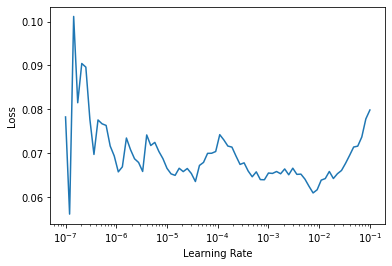

In [ ]:
# Run learning rate finder
learn.lr_find()
#learn.recorder.plot()



In [ ]:
# Unfreeze all the layers
learn.unfreeze()



In [ ]:
# Learn
learn.fit_one_cycle(10, 0.005)
#learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.064811,0.069026,0.975994,0.980334,0.988107,01:56
1,0.069327,0.080352,0.975244,0.980315,0.987116,01:55
2,0.082007,0.099686,0.967742,0.977273,0.980178,01:55
3,0.076594,0.072453,0.978245,0.981336,0.990089,01:55
4,0.070695,0.087293,0.964741,0.985859,0.967294,01:54
5,0.062571,0.073584,0.967742,0.983000,0.974232,01:54
6,0.039565,0.090500,0.971493,0.985015,0.977205,01:54
7,0.034315,0.085063,0.974494,0.984111,0.982161,01:53
8,0.023742,0.085270,0.973743,0.987976,0.977205,01:53
9,0.018160,0.081121,0.976744,0.985119,0.984143,01:54


Bei den Metriken hat sich nichts mehr getan, also hätte vermutlich auch ein Cycle gereicht.

### 7. Fit the model

Use your knowdledge on model training to fit your model!

In [ ]:
# Write your code here

### 8. Evaluate the model

You' ve already seen many ways to evaluate a model. Evaluate your model in a qualitative and quantitative manner.

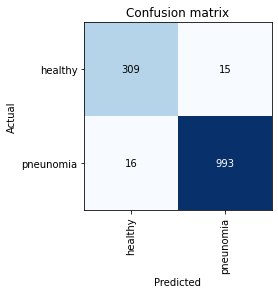

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

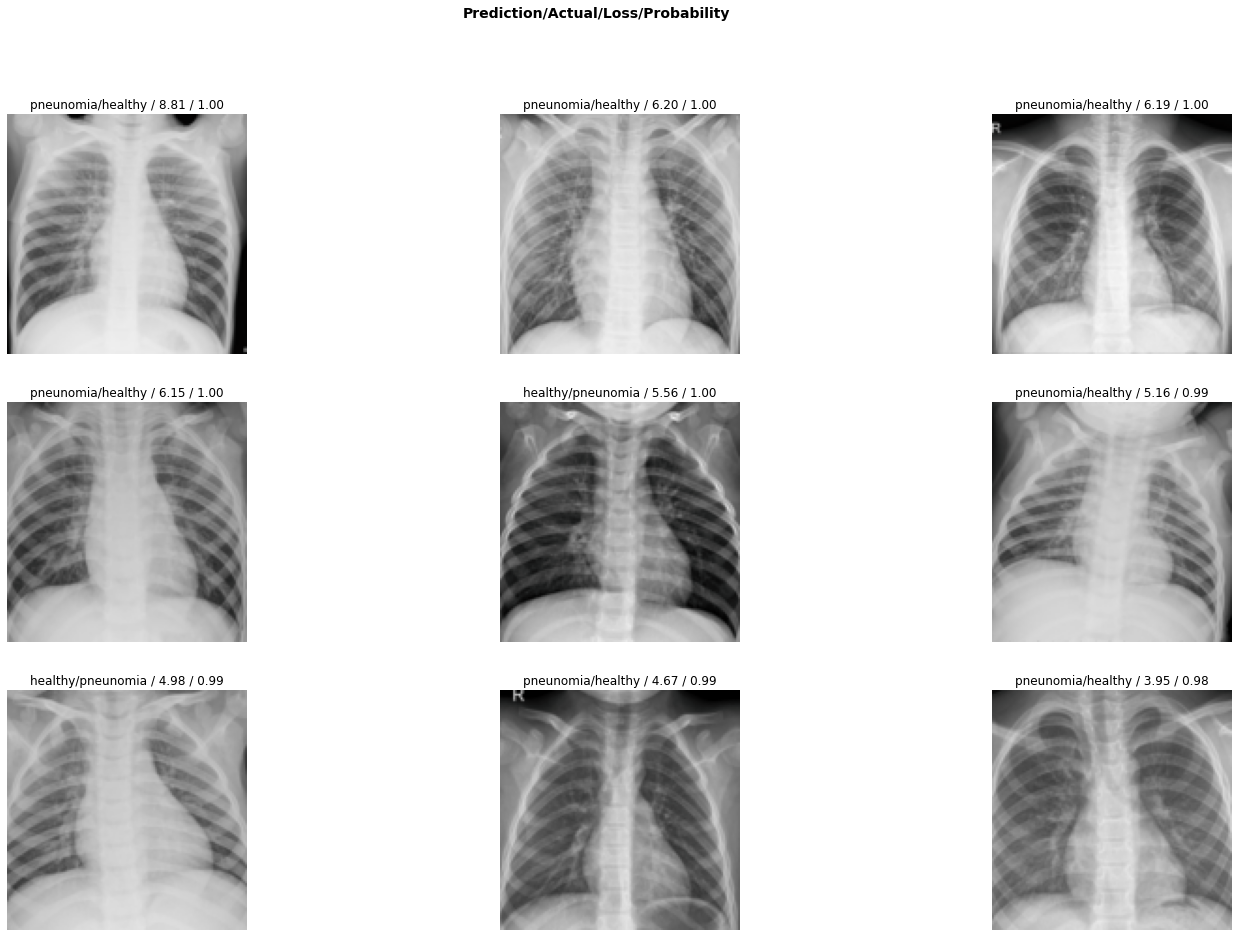

In [ ]:
interp.plot_top_losses(9, figsize=(25,15))

Die Metriken von ca. 97% und die Confusion Matrix sehen sehr gut aus. Die Top Losses sind in diesem Fall wenig hilfreich. Zumindest kann man daraus schließen, dass keine unsinnigen Bilder im Datenset sind, die man jetzt cleanen müsste.

### 9. Clean your data

Based on the evaluation, you may want to clean your data using the `ImageClassifierCleaner`.
- Remeber to delete the selected data after using the cleaner:
    ```python
    for idx in cleaner.delete(): cleaner.fns[idx].unlink()
    ```
    
    
- Once we've cleaned up our data, we can retrain our model. 



In [ ]:
# Write your code here

## Turning Your Model into an Online Application

Now, take your app into production. You can follow the steps from the lecure:

- Export your model via `learn.export`
- Upload your model to [Github Releases](https://docs.github.com/en/free-pro-team@latest/github/administering-a-repository/about-releases) to make it publicly available at your repository.
- Create and upload a new notebook that only contains the necassary code and IPython widgets for your App. 
    - Remeber to download the exported model from *Github Releases*
    - Include a brief description of your app and the functionalities
- Publish your web app on [Binder](https://mybinder.org/) using Voilà

You can use the [example](https://github.com/pds2021/course/blob/main/nbs/07_Bear_App.ipynb) from the lecture as an orientation.

If you're familiar with the world of web application development, you're free to use these skills and all your tools and ressources!

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

## Finally, Provide a Link to Your App

In [ ]:
https://mybinder.org/v2/gh/pds2021/a5-ChrNikEsc/HEAD?urlpath=%2Fvoila%2Frender%2FLungen_R%C3%B6ntgen_App.ipynb
